In [118]:
import pandas as pd

df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [119]:
df.shape

(284807, 31)

In [120]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [121]:
df.shape

(283726, 31)

In [122]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [123]:
df_unique_cols = df.apply(lambda col: col.where(~col.duplicated()))

In [124]:
df.shape

(283726, 31)

In [125]:
df = df.dropna()

In [126]:
df.shape

(283726, 31)

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
normalized_df = pd.DataFrame(normalized_data, columns=df.select_dtypes(include=['float64', 'int64']).columns)
final_df = pd.concat([normalized_df, df.select_dtypes(exclude=['float64', 'int64']).reset_index(drop=True)], axis=1)
print(final_df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1  0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2  0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3  0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4  0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.266815  0.786444  0.475312  ...  0.561184  0.522992  0.663793  0.391253   
1  0.264875  0.786298  0.453981  ...  0.557840  0.480237  0.666938  0.336440   
2  0.270177  0.788042  0.410603  ...  0.565477  0.546030  0.678939  0.289354   
3  0.266803  0.789434  0.414999  ...  0.559734  0.510277  0.662607  0.223826   
4  0.268968  0.782484  0.490950  ...  0.561327  0.547271  0.663392  0.401270   

        V25       V26       V27       V28    Amount  Class  
0  0.58

In [128]:
df = df.iloc[:, 1:]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


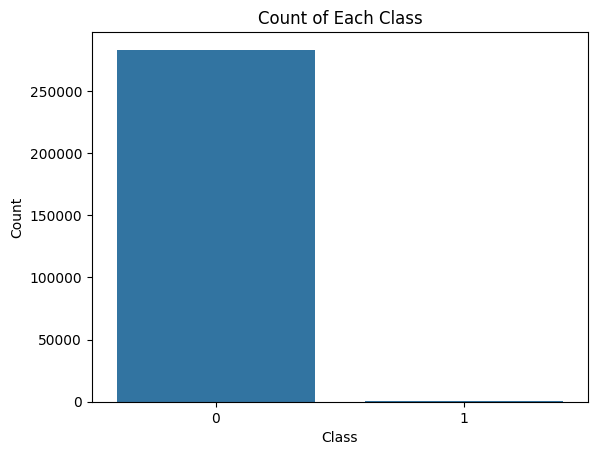

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Class')
plt.title('Count of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


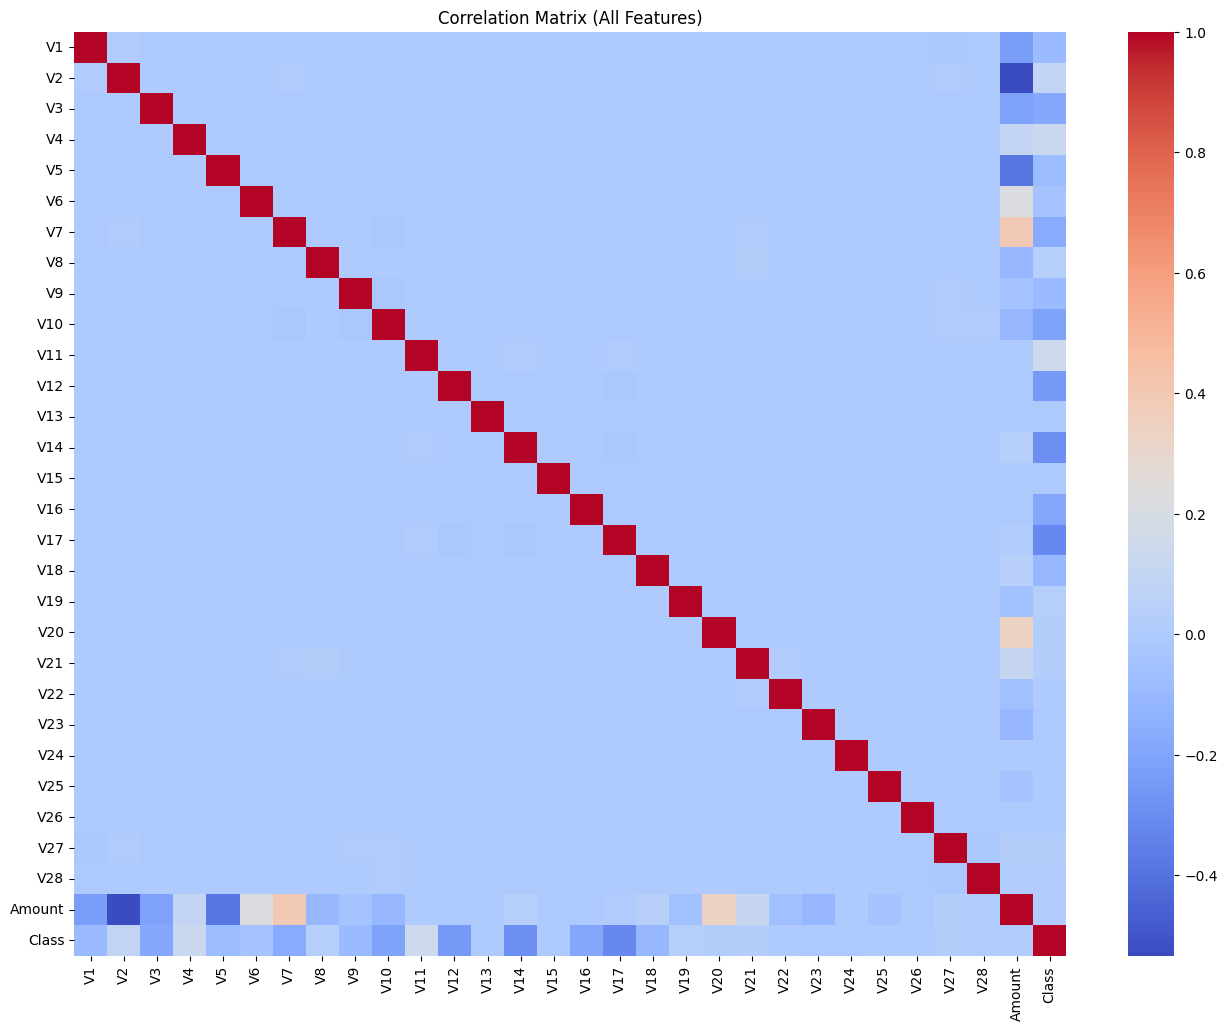

<ipython-input-130-662517405>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_target_corr.values, y=feature_target_corr.index, palette="viridis")


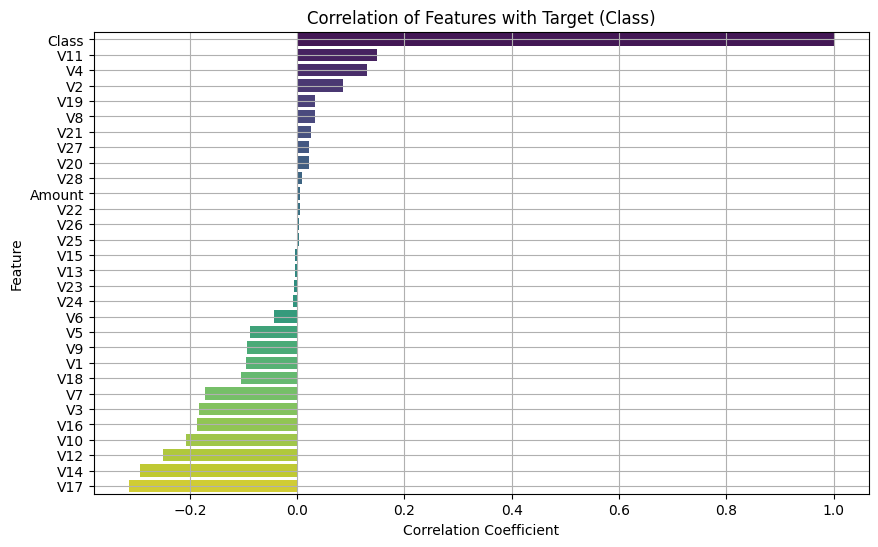

In [130]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix (All Features)')
plt.show()

feature_target_corr = correlation_matrix['Class'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_target_corr.values, y=feature_target_corr.index, palette="viridis")
plt.title('Correlation of Features with Target (Class)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

In [131]:
class_counts = df['Class'].value_counts()
print(class_counts)


Class
0    283253
1       473
Name: count, dtype: int64


In [132]:
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))


Mean:
 V1         0.005917
V2        -0.004135
V3         0.001613
V4        -0.002966
V5         0.001828
V6        -0.001139
V7         0.001801
V8        -0.000854
V9        -0.001596
V10       -0.001441
V11        0.000202
V12       -0.000715
V13        0.000603
V14        0.000252
V15        0.001043
V16        0.001162
V17        0.000170
V18        0.001515
V19       -0.000264
V20        0.000187
V21       -0.000371
V22       -0.000015
V23        0.000198
V24        0.000214
V25       -0.000232
V26        0.000149
V27        0.001763
V28        0.000547
Amount    88.472687
Class      0.001667
dtype: float64

Median:
 V1         0.020384
V2         0.063949
V3         0.179963
V4        -0.022248
V5        -0.053468
V6        -0.275168
V7         0.040859
V8         0.021898
V9        -0.052596
V10       -0.093237
V11       -0.032306
V12        0.139072
V13       -0.012927
V14        0.050209
V15        0.049299
V16        0.067119
V17       -0.065867
V18       -0.002142
V19     

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Class', axis=1)
y = df['Class']
print(X)
print(y)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
283721 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
283722  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
283723   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
283724  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
283725  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(y_train.value_counts())

Class
0    226602
1       378
Name: count, dtype: int64


In [135]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [136]:
print(X_train_resampled)

              V1        V2        V3        V4        V5        V6        V7  \
0       2.238954 -1.724499 -2.151484 -2.577803  0.993668  3.565492 -1.785957   
1      -1.315062  1.630783  0.597001 -0.038359 -0.404580 -0.965712  0.212249   
2       1.908801  0.021184 -2.087997  0.129310  1.161468  0.605244 -0.022371   
3       1.811257  0.316556  0.316751  3.880231  0.048454  1.020163 -0.734868   
4       1.358817 -1.120881  0.550266 -1.547659 -1.194950  0.275448 -1.201843   
...          ...       ...       ...       ...       ...       ...       ...   
453199 -2.300067  2.670135 -6.046383  3.105209 -1.208339 -1.811392 -0.268504   
453200 -1.188173  1.685884 -2.954120  2.484046  3.458481 -3.066163 -5.751724   
453201 -1.436395  0.927817 -2.364847  1.134957 -1.008960 -1.239829 -2.600386   
453202  1.128816  1.291563 -1.358572  2.101199  0.847358 -1.063046  0.390835   
453203 -3.945866  1.475418 -2.815222  2.215607 -1.641543 -0.461295 -2.438766   

              V8        V9       V10  .

In [137]:
print(y_train_resampled)

0         0
1         0
2         0
3         0
4         0
         ..
453199    1
453200    1
453201    1
453202    1
453203    1
Name: Class, Length: 453204, dtype: int64


In [138]:
print(y_train_resampled.value_counts())


Class
0    226602
1    226602
Name: count, dtype: int64


In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.87      0.14        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746



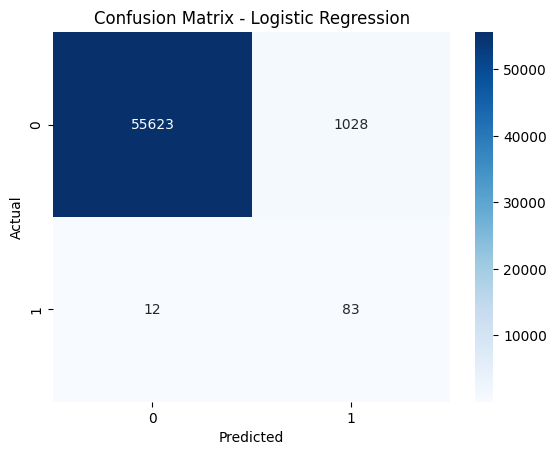

In [140]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

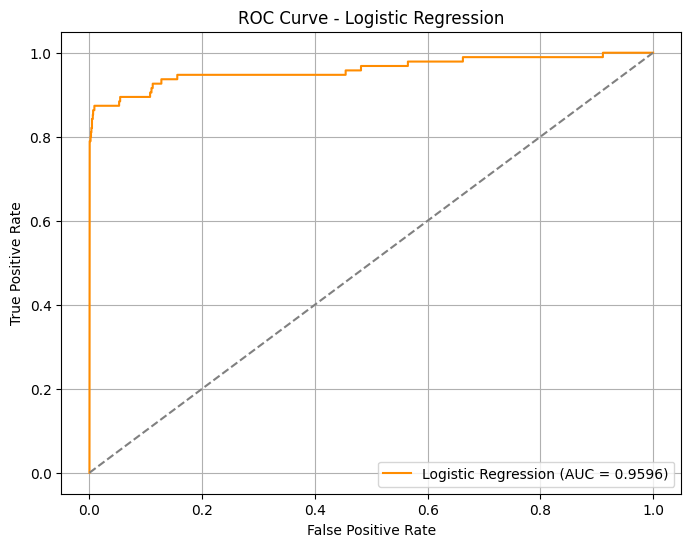

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.81      0.85        95

    accuracy                           1.00     56746
   macro avg       0.94      0.91      0.92     56746
weighted avg       1.00      1.00      1.00     56746



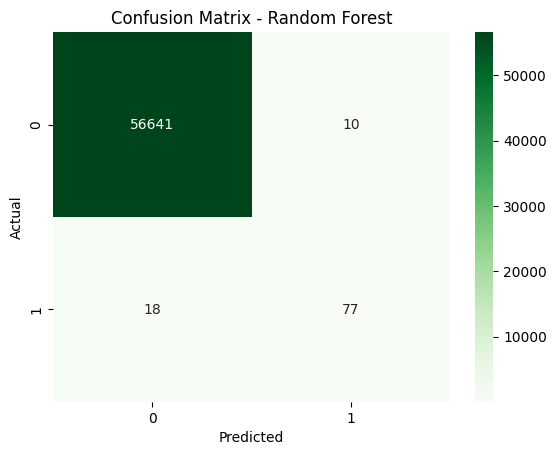

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

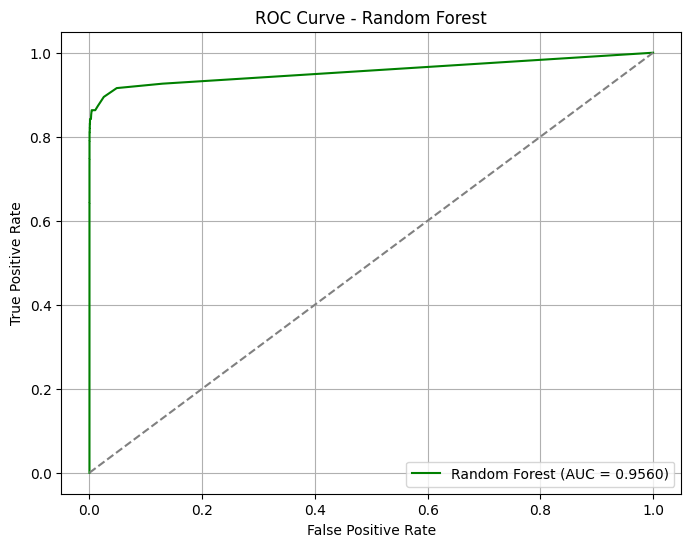

In [143]:
y_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'Random Forest (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:37:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.58      0.80      0.68        95

    accuracy                           1.00     56746
   macro avg       0.79      0.90      0.84     56746
weighted avg       1.00      1.00      1.00     56746



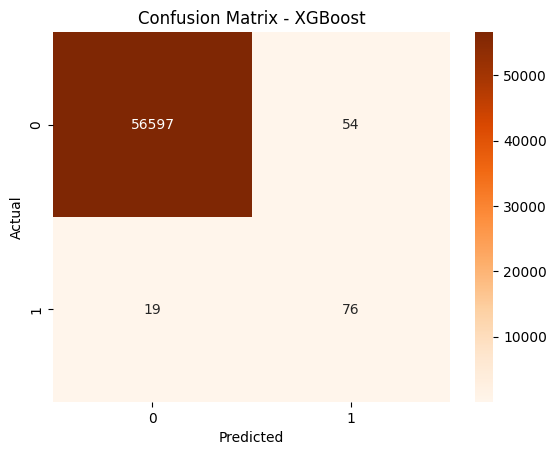

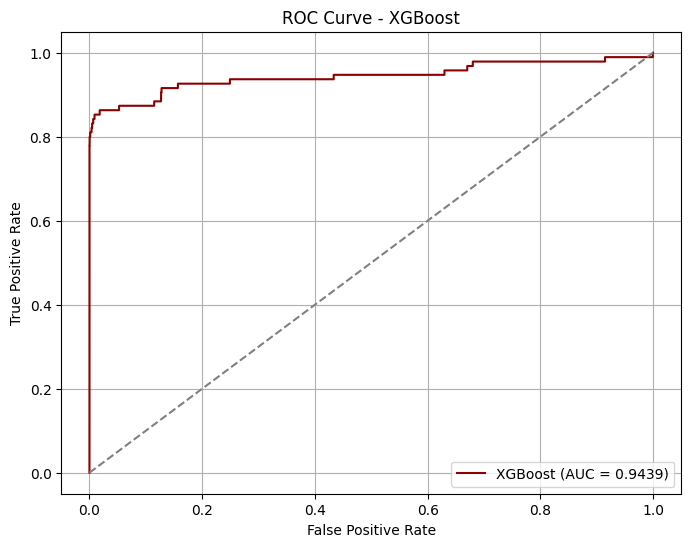

In [144]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()
y_probs = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.4f})', color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()